In [194]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import os
from mtcnn.mtcnn import MTCNN
from PIL import Image
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
model = DeepFace.build_model(model_name='Facenet512')

In [58]:
model = model.model

In [178]:
train_dir = "face_embeddings_models/dataset/train" 
val_dir = "face_embeddings_models/dataset/val"

In [179]:
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	if len(results) > 0:
		# Extract the bounding box of the first face
		x1, y1, width, height = results[0]['box']
		x1, y1 = abs(x1), abs(y1)
		x2, y2 = x1 + width, y1 + height
		# extract the face
		face = pixels[y1:y2, x1:x2]
		# resize pixels to the model size
		image = Image.fromarray(face)
		image = image.resize(required_size)
		face_array = asarray(image)
		return face_array
	else:
		return None

In [180]:
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	print(samples.shape)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]

In [181]:
train_embeddings = {}
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        face = extract_face(image_path)
        train_embeddings[class_name] = get_embedding(model, face)

(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
(1, 160, 1

In [182]:
val_embeddings = {}
val_labels = {}
for class_name in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        face = extract_face(image_path)
        val_embeddings[class_name] = get_embedding(model, face)
        val_labels[class_name] = class_name 

(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
(1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
(1, 160, 1

In [ ]:
from scipy.spatial.distance import euclidean

In [184]:
y_true = []  # Ground truth
y_pred = []  # Prediksi

In [185]:
data = []

In [186]:
for val_class, val_emb in val_embeddings.items():
    best_match = None
    best_distance = float('inf')
    all_distances = []

    for train_class, train_emb in train_embeddings.items():
        distance = euclidean(val_emb, train_emb)
        all_distances.append(distance)

        if distance < best_distance:
            best_distance = distance
            best_match = train_class

    max_distance = max(all_distances)
    confidence = 1 - (best_distance / max_distance)

    y_true.append(val_class)
    y_pred.append(best_match)

    data.append({
        'Val Class': val_class,
        'Predicted': best_match,
        'Best Distance': best_distance,
        'Max Distance': max_distance,
        'Confidence': confidence
    })

In [187]:
df = pd.DataFrame(data)

In [188]:
df

,Val Class,Predicted,Best Distance,Max Distance,Confidence
0,Jennifer Lawrence,Jennifer Lawrence,15.980239,35.173828,0.545678
1,Ahmad Aria,Ahmad Aria,19.659407,32.855217,0.401635
2,Yayun Eldina,Yayun Eldina,11.479020,35.967003,0.680846
3,Fitria,Fitria,11.530563,39.014206,0.704452
4,Vunky Himawan,Vunky Himawan,12.454639,34.060932,0.634342
5,Nicole Kidman,Nicole Kidman,14.590935,36.086891,0.595672
6,Angelina Jolie,Angelina Jolie,15.147384,32.437656,0.533031
7,Johnny Depp,Johnny Depp,17.863825,33.129768,0.460792
8,Denzel Washington,Denzel Washington,15.171340,33.037376,0.540783
9,Tom Cruise,Tom Cruise,4.810493,34.648937,0.861165


In [189]:
accuracy = sum([1 if y1 == y2 else 0 for y1, y2 in zip(y_true, y_pred)]) / len(y_true)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [190]:
from sklearn.metrics import classification_report, confusion_matrix

In [191]:
print(classification_report(y_true, y_pred))

                    precision    recall  f1-score   support

     Achmad Raihan       1.00      1.00      1.00         1
        Ahmad Aria       1.00      1.00      1.00         1
    Angelina Jolie       1.00      1.00      1.00         1
         Brad Pitt       1.00      1.00      1.00         1
 Denzel Washington       1.00      1.00      1.00         1
            Fitria       1.00      1.00      1.00         1
        Haidar Aly       1.00      1.00      1.00         1
      Hugh Jackman       1.00      1.00      1.00         1
 Jennifer Lawrence       1.00      1.00      1.00         1
       Johnny Depp       1.00      1.00      1.00         1
      Kate Winslet       1.00      1.00      1.00         1
 Leonardo DiCaprio       1.00      1.00      1.00         1
         Megan Fox       1.00      1.00      1.00         1
     Muhamad Anang       1.00      1.00      1.00         1
   Natalie Portman       1.00      1.00      1.00         1
     Nicole Kidman       1.00      1.00

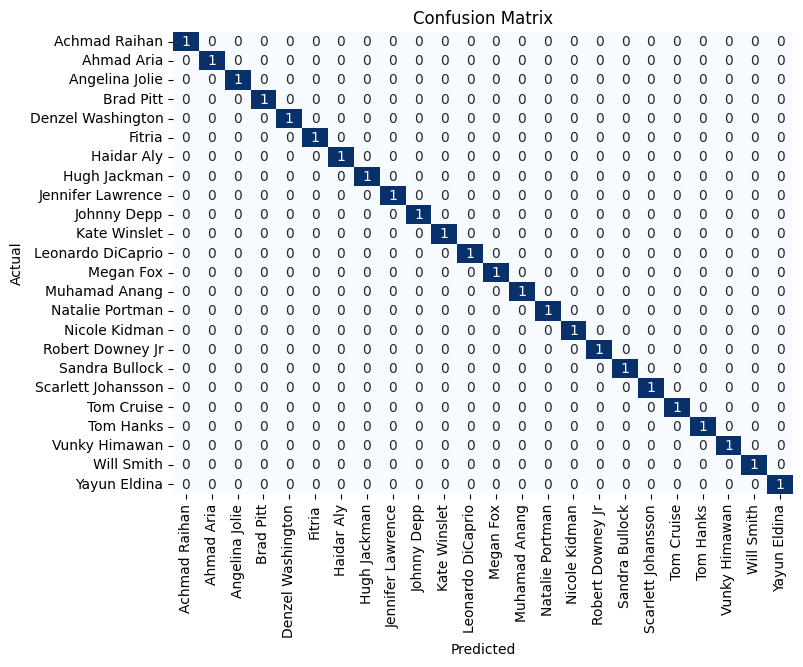

In [195]:
cm = confusion_matrix(y_true, y_pred)

# Get the unique labels from y_true
labels = np.unique(y_true)

# Visualize with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)

# Add title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()
